In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import  cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# cifar10.lo

In [3]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse",	"ship",	"truck"]

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

C:\Users\JITHIN\AppData\Local\Temp\ipykernel_17080\4003865314.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


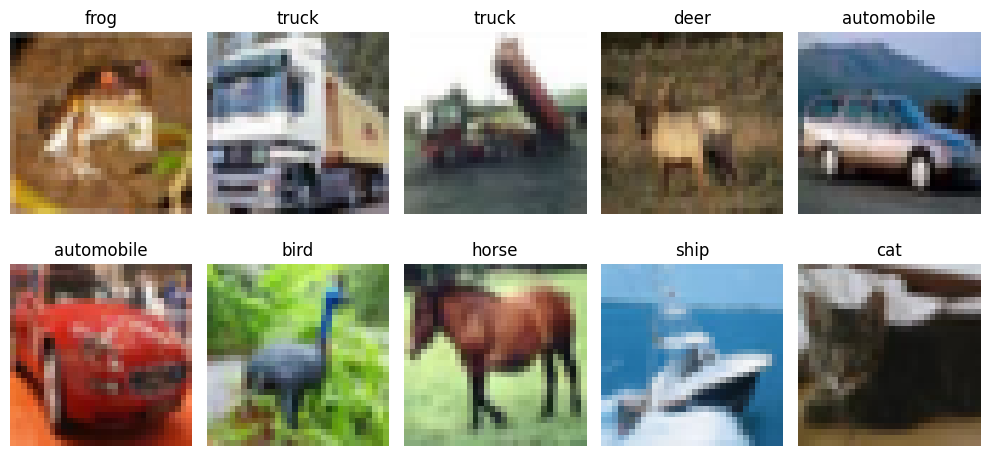

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [ ]:
# [6,9]

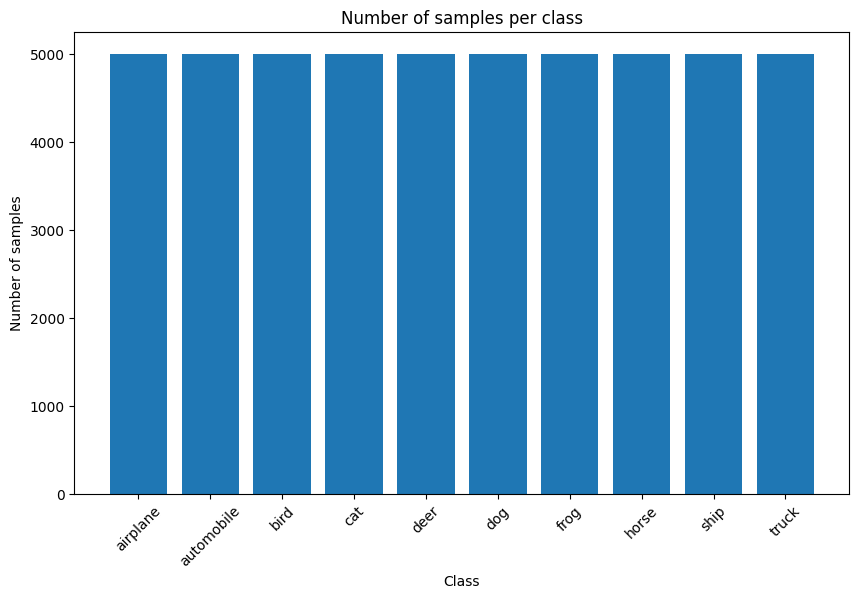

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [7]:
labels = y_train.flatten()

# Count the number of samples per class
class_counts = Counter(labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

# Optional: print counts for reference
for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")

In [8]:
labels

array([6, 9, 9, ..., 9, 1, 1], shape=(50000,), dtype=uint8)

In [9]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [10]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
# cat or 0 = [0,1,0,0,0,]

In [12]:
# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Create a preprocessing layer for normalization
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)

In [13]:
X_train

<tf.Tensor: shape=(50000, 32, 32, 3), dtype=float32, numpy=
array([[[[0.23137257, 0.24313727, 0.24705884],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607845, 0.18823531, 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352945],
         [0.59607846, 0.4901961 , 0.40000004],
         [0.5803922 , 0.48627454, 0.4039216 ]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235297, 0.34509805, 0.21568629],
         [0.4666667 , 0.3254902 , 0.19607845],
         [0.4784314 , 0.34117648, 0.22352943]],

        [[0.09803922, 0.09411766, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215688, 0.10588236, 0.03137255],
         ...,
         [0.46274513, 0.32941177, 0.19607845],
         [0.47058827, 0.32941177, 0.19607845],
         [0.427451  , 0.28627452, 0.16470589]],

        ...,

        [[0.81568635, 0.6666667 

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=3,           # stop if no improvement after 3 epochs
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
def build_cnn():

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        # Dropout(0.25),
        Dense(10, activation='softmax')
    ])
    return model

In [16]:
model_adam = build_cnn()
model_sgd = build_cnn()

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model_adam.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train_cat, epochs=40, validation_data=(X_test, y_test_cat),batch_size = 64, callbacks = checkpoint)

Epoch 1/40
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3450 - loss: 1.7629
Epoch 1: val_loss improved from None to 1.24379, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.4386 - loss: 1.5340 - val_accuracy: 0.5562 - val_loss: 1.2438
Epoch 2/40
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5731 - loss: 1.2055
Epoch 2: val_loss improved from 1.24379 to 1.14181, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.5893 - loss: 1.1597 - val_accuracy: 0.6004 - val_loss: 1.1418
Epoch 3/40
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6417 - loss: 1.0316
Epoch 3: val_loss improved from 1.14181 to 0.95198, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.6483 - loss: 1.0033 - val_accuracy: 0.6688 - val_loss: 0.9520
Epoch 4/40
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6818 - loss: 0.9047
Epoch 4: val_loss improved from 0.95198 to 

In [ ]:
# model_adam.save("model_adamv_1.keras")

In [19]:
checkpoint_sgd = ModelCheckpoint(
    filepath='best_model_sgd_v1.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
model_sgd.compile(optimizer= optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(X_train, y_train_cat, epochs=40, validation_data=(X_test, y_test_cat),batch_size = 64,callbacks = checkpoint_sgd)

Epoch 1/40
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1372 - loss: 2.2598
Epoch 1: val_loss improved from None to 1.97878, saving model to best_model_sgd_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.1866 - loss: 2.1858 - val_accuracy: 0.2775 - val_loss: 1.9788
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2892 - loss: 1.9569
Epoch 2: val_loss improved from 1.97878 to 1.84732, saving model to best_model_sgd_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3072 - loss: 1.9078 - val_accuracy: 0.3456 - val_loss: 1.8473
Epoch 3/40
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3647 - loss: 1.7660
Epoch 3: val_loss improved from 1.84732 to 1.73765, saving model to best_model_sgd_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3813 - loss: 1.7229 - val_accuracy: 0.3724 - val_loss: 1.7377
Epoch 4/40
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4281 - loss: 1.5984
Epoch 4: val_loss impr

In [21]:
def loss_accuracy(model):
    loss, accuracy = model.evaluate(X_test,y_test_cat)
    print(f"Test accuracy for the model: {accuracy:.4f}")
    print(f"Test loss for the model: {loss:.4f}")



In [22]:
model_sgd.save("model_sgd_v1.keras")

In [24]:
from tensorflow.keras.models import load_model

In [30]:
load_adam_best = load_model("best_model.keras")

In [31]:
load_sgd_best = load_model("best_model_sgd_v1.keras")

In [32]:
loss_accuracy(load_adam_best)
loss_accuracy(load_sgd_best)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7175 - loss: 0.8246
Test accuracy for the model: 0.7175
Test loss for the model: 0.8246
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6733 - loss: 0.9616
Test accuracy for the model: 0.6733
Test loss for the model: 0.9616


In [33]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [ ]:
aug = augemented 

In [35]:
model_adam_aug = build_cnn()

model_adam_aug.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_adam_aug = model_adam_aug.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=25,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test_cat),
    callbacks= ModelCheckpoint(filepath='best_model_adam_aug_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1),
    verbose=1
)

Epoch 1/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3038 - loss: 1.8648
Epoch 1: val_loss improved from None to 1.33742, saving model to best_model_adam_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 58s 72ms/step - accuracy: 0.3916 - loss: 1.6463 - val_accuracy: 0.5147 - val_loss: 1.3374
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.4531 - loss: 1.5332

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 1.33742
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4531 - loss: 1.5332 - val_accuracy: 0.5012 - val_loss: 1.3734
Epoch 3/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5115 - loss: 1.3536
Epoch 3: val_loss improved from 1.33742 to 1.25807, saving model to best_model_adam_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.5260 - loss: 1.3202 - val_accuracy: 0.5470 - val_loss: 1.2581
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4062 - loss: 1.4752
Epoch 4: val_loss did not improve from 1.25807
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4062 - loss: 1.4752 - val_accuracy: 0.5294 - val_loss: 1.3094
Epoch 5/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5732 - loss: 1.2008
Epoch 5: val_loss improved from 1.25807 to 1.08255, saving model to best_model_adam_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.5803 - loss: 1.1853 - val_accuracy: 0.6

In [36]:
load_aug_adam = load_model("best_model_adam_aug_v1.keras")

In [39]:
loss_accuracy(load_aug_adam)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7212 - loss: 0.8082
Test accuracy for the model: 0.7212
Test loss for the model: 0.8082


In [40]:
def metrics_scoring(model_name):
  y_pred_probs = model_name.predict(X_test)
  y_pred = y_pred_probs.argmax(axis=1)
  y_true = y_test_cat.argmax(axis=1)
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='weighted')
  rec = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  print(f"Accuracy: {acc:.4f}")
  print(f"Precision: {prec:.4f}")
  print(f"Recall: {rec:.4f}")
  print(f"F1 Score: {f1:.4f}")


In [41]:
metrics_scoring(load_aug_adam)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.7212
Precision: 0.7194
Recall: 0.7212
F1 Score: 0.7153


In [42]:
metrics_scoring(load_adam_best)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.7175
Precision: 0.7213
Recall: 0.7175
F1 Score: 0.7178


In [43]:
model_sgd_aug = build_cnn()

model_sgd_aug.compile(
    optimizer=optimizers.SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_sgd_aug = model_adam_aug.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=25,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test_cat),
    callbacks= ModelCheckpoint(filepath='best_model_sgd_aug_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1),
    verbose=1
)

Epoch 1/25


c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7282 - loss: 0.7795
Epoch 1: val_loss improved from None to 0.74895, saving model to best_model_sgd_aug_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.7265 - loss: 0.7849 - val_accuracy: 0.7377 - val_loss: 0.7489
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.7188 - loss: 0.8122

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.74895
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7188 - loss: 0.8122 - val_accuracy: 0.7327 - val_loss: 0.7608
Epoch 3/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7309 - loss: 0.7732
Epoch 3: val_loss did not improve from 0.74895
781/781 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.7320 - loss: 0.7721 - val_accuracy: 0.7268 - val_loss: 0.7978
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.7031 - loss: 0.7605
Epoch 4: val_loss did not improve from 0.74895
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7031 - loss: 0.7605 - val_accuracy: 0.7262 - val_loss: 0.8001
Epoch 5/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7393 - loss: 0.7525
Epoch 5: val_loss did not improve from 0.74895
781/781 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7368 - loss: 0.7530 - val_accuracy: 0.7422 - val_loss: 0.7539
Epoch 6/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8125 - lo

In [45]:
load_sgd_aug = load_model("best_model_sgd_aug_v1.keras")

In [46]:
loss_accuracy(load_sgd_aug)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7733 - loss: 0.6475
Test accuracy for the model: 0.7733
Test loss for the model: 0.6475


In [47]:
metrics_scoring(load_sgd_aug)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.7733
Precision: 0.7746
Recall: 0.7733
F1 Score: 0.7717


In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plt_confusion_matrix(model):
    y_pred = model.predict(X_test).argmax(axis=1)
    y_true = y_test_cat.argmax(axis=1)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


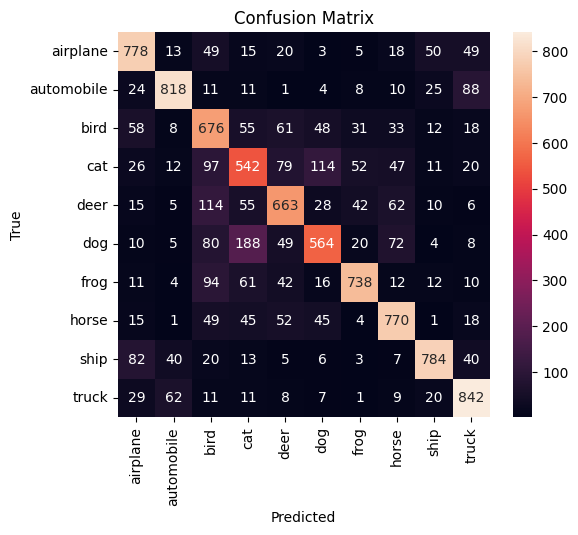

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


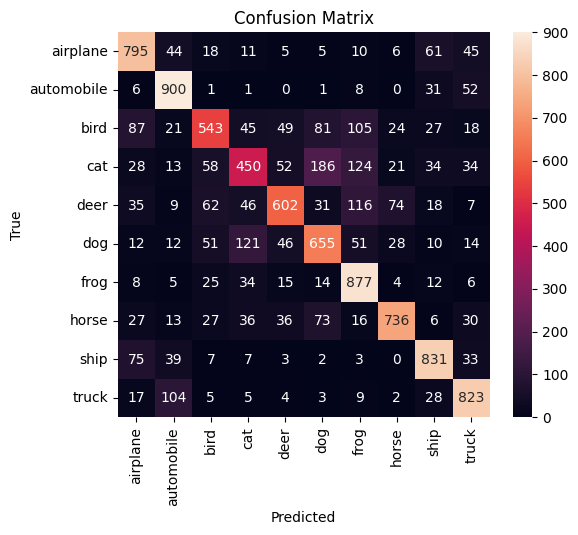

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


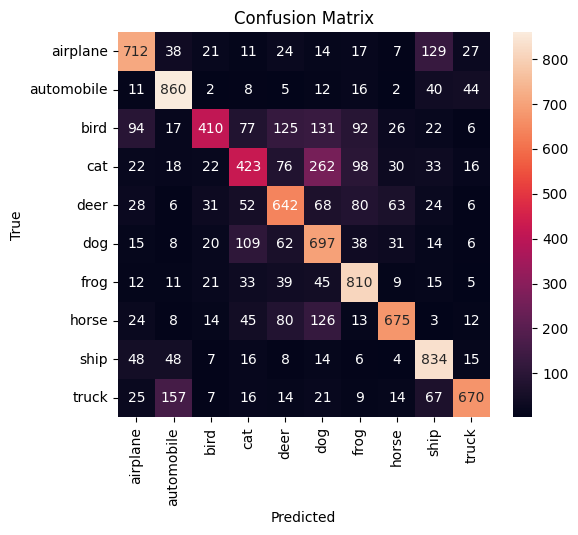

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


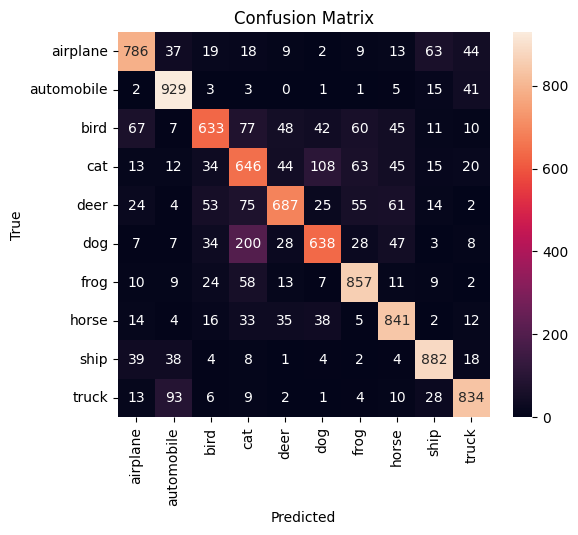

In [56]:
plt_confusion_matrix(load_adam_best)
plt_confusion_matrix(load_aug_adam)
plt_confusion_matrix(load_sgd_best)
plt_confusion_matrix(load_sgd_aug)

In [61]:
def build_cnn_more_layer():
    model_more = Sequential([
        Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model_more


In [63]:
model_adam_more_layer = build_cnn_more_layer()

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model_adam_more_layer.compile(optimizer= optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam_mrlayer = model_adam_more_layer.fit(X_train, y_train_cat, epochs=40, validation_data=(X_test, y_test_cat),batch_size = 64,
    callbacks= ModelCheckpoint(filepath='best_model_adam_mrlyr_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2920 - loss: 1.8468
Epoch 1: val_loss improved from None to 1.27068, saving model to best_model_adam_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.3976 - loss: 1.6017 - val_accuracy: 0.5353 - val_loss: 1.2707
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5564 - loss: 1.2296
Epoch 2: val_loss improved from 1.27068 to 1.03579, saving model to best_model_adam_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5799 - loss: 1.1745 - val_accuracy: 0.6296 - val_loss: 1.0358
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6466 - loss: 0.9988
Epoch 3: val_loss did not improve from 1.03579
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6551 - loss: 0.9796 - val_accuracy: 0.6272 - val_loss: 1.0715
Epoch 4/40
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6957 - loss: 0.8747
Epoch 4: val_loss improved from 1.03579 to 0.93958, s

In [65]:
model_sgd_more_layer = build_cnn_more_layer()

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model_sgd_more_layer.compile(optimizer= optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd_mrlayer = model_sgd_more_layer.fit(X_train, y_train_cat, epochs=40, validation_data=(X_test, y_test_cat),batch_size = 64,
    callbacks= ModelCheckpoint(filepath='best_model_sgd_mrlyr_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1113 - loss: 2.2992
Epoch 1: val_loss improved from None to 2.25792, saving model to best_model_sgd_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.1301 - loss: 2.2914 - val_accuracy: 0.2064 - val_loss: 2.2579
Epoch 2/40
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1925 - loss: 2.1925
Epoch 2: val_loss improved from 2.25792 to 2.19647, saving model to best_model_sgd_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.2172 - loss: 2.1229 - val_accuracy: 0.2143 - val_loss: 2.1965
Epoch 3/40
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2785 - loss: 1.9769
Epoch 3: val_loss improved from 2.19647 to 2.10678, saving model to best_model_sgd_mrlyr_v1.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.2937 - loss: 1.9356 - val_accuracy: 0.2346 - val_loss: 2.1068
Epoch 4/40
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3388 - loss: 1.8169
Epoc

In [ ]:
# load_adam_mrlyr = load_model("")

In [67]:
model_adam_aug_mrlyr = build_cnn_more_layer()

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model_adam_aug_mrlyr.compile(optimizer= optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [70]:
history_adam_aug_mrlyr = model_adam_aug_mrlyr.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=25,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test_cat),
    callbacks= ModelCheckpoint(filepath='bm_adam_aug_mrlyr_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1),
    verbose=1
)

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2662 - loss: 1.9237
Epoch 1: val_loss improved from None to 1.42664, saving model to bm_adam_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 84s 103ms/step - accuracy: 0.3583 - loss: 1.7086 - val_accuracy: 0.4805 - val_loss: 1.4266
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.4375 - loss: 1.4366

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 1.42664
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4375 - loss: 1.4366 - val_accuracy: 0.4723 - val_loss: 1.4438
Epoch 3/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4962 - loss: 1.3841
Epoch 3: val_loss improved from 1.42664 to 1.17594, saving model to bm_adam_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.5178 - loss: 1.3313 - val_accuracy: 0.5849 - val_loss: 1.1759
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4844 - loss: 1.4215
Epoch 4: val_loss improved from 1.17594 to 1.16185, saving model to bm_adam_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4844 - loss: 1.4215 - val_accuracy: 0.5867 - val_loss: 1.1619
Epoch 5/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5702 - loss: 1.2088
Epoch 5: val_loss improved from 1.16185 to 1.07110, saving model to bm_adam_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accurac

In [71]:
model_sgd_aug_mrlyr = build_cnn_more_layer()

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model_sgd_aug_mrlyr.compile(optimizer= optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [73]:
history_sgd_aug_mrlyr = model_sgd_aug_mrlyr.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=25,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test_cat),
    callbacks= ModelCheckpoint(filepath='bm_sgd_aug_mrlyr_v1.keras', monitor='val_loss',save_best_only=True, mode='min', verbose=1),
    verbose=1
)

Epoch 1/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.2800 - loss: 1.9108
Epoch 1: val_loss improved from None to 1.35012, saving model to bm_sgd_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.3722 - loss: 1.6875 - val_accuracy: 0.5053 - val_loss: 1.3501
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.4062 - loss: 1.5042
Epoch 2: val_loss improved from 1.35012 to 1.34195, saving model to bm_sgd_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4062 - loss: 1.5042 - val_accuracy: 0.5059 - val_loss: 1.3420
Epoch 3/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5049 - loss: 1.3658
Epoch 3: val_loss improved from 1.34195 to 1.17030, saving model to bm_sgd_aug_mrlyr_v1.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.5234 - loss: 1.3190 - val_accuracy: 0.5861 - val_loss: 1.1703
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5469 - loss: 1.1997
Epoch 4: val_los

In [ ]:
# # Load your previously trained model
# model = load_model("model_adam.keras")

# # Define checkpoint to keep saving best model
# checkpoint = ModelCheckpoint(
#     filepath='model_adam_continue.keras',
#     monitor='val_loss',
#     save_best_only=True,
#     mode='min',
#     verbose=1
# )

# # Continue training from the last epoch
# history = model.fit(
#     X_train, y_train_cat,
#     validation_data=(X_test, y_test_cat),
#     epochs=40,          # new total (not additional) → goes from current state up to 40
#     initial_epoch=20,   # resumes at epoch 20 (where you stopped before)
#     batch_size=64,
#     callbacks=[checkpoint]
# )

In [74]:
load_adm_mrlyr = load_model("best_model_adam_mrlyr_v1.keras")
load_sgd_mrlyr = load_model("best_model_sgd_mrlyr_v1.keras")
load_adm_aug_mrlyr = load_model("bm_adam_aug_mrlyr_v1.keras")
load_sgd_aug_mrlyr = load_model("bm_sgd_aug_mrlyr_v1.keras")


In [75]:
loss_accuracy(load_adm_mrlyr)
loss_accuracy(load_sgd_mrlyr)
loss_accuracy(load_adm_aug_mrlyr)
loss_accuracy(load_sgd_aug_mrlyr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7192 - loss: 0.8402
Test accuracy for the model: 0.7192
Test loss for the model: 0.8402
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6734 - loss: 0.9349
Test accuracy for the model: 0.6734
Test loss for the model: 0.9349
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7339 - loss: 0.7787
Test accuracy for the model: 0.7339
Test loss for the model: 0.7787
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7398 - loss: 0.7635
Test accuracy for the model: 0.7398
Test loss for the model: 0.7635


In [76]:
metrics_scoring(load_adm_mrlyr)
metrics_scoring(load_sgd_mrlyr)
metrics_scoring(load_adm_aug_mrlyr)
metrics_scoring(load_sgd_aug_mrlyr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.7192
Precision: 0.7238
Recall: 0.7192
F1 Score: 0.7183
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.6734
Precision: 0.6889
Recall: 0.6734
F1 Score: 0.6748
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.7339
Precision: 0.7358
Recall: 0.7339
F1 Score: 0.7298
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.7398
Precision: 0.7384
Recall: 0.7398
F1 Score: 0.7355


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


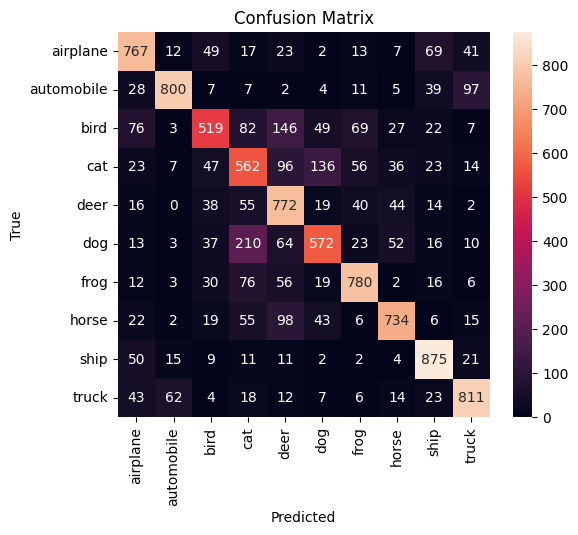

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


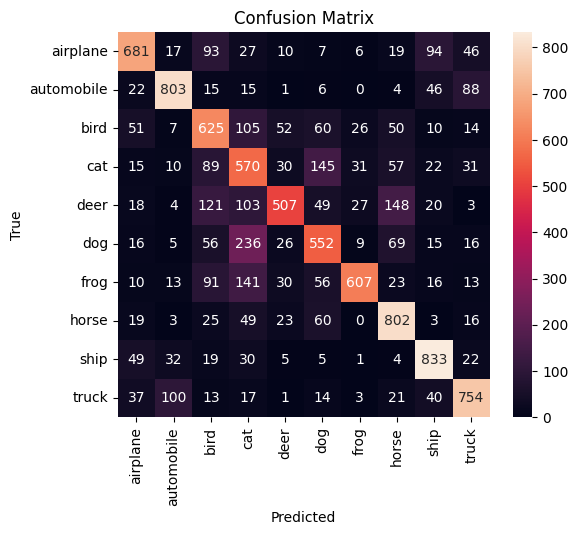

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


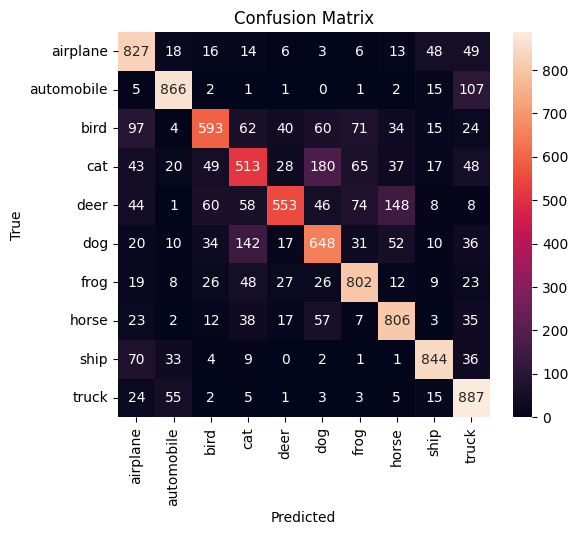

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


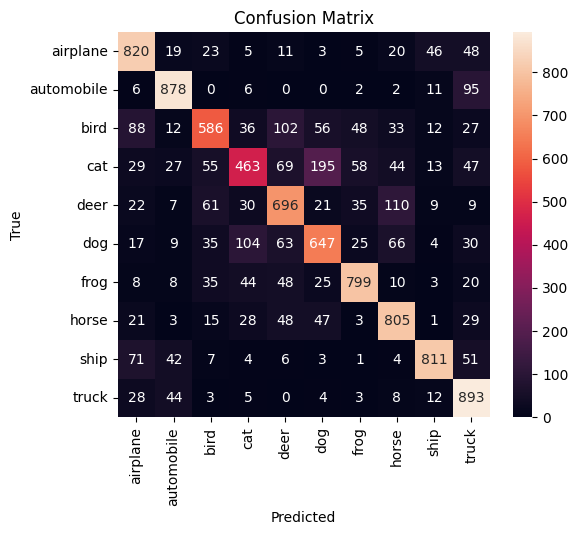

In [77]:
plt_confusion_matrix(load_adm_mrlyr)
plt_confusion_matrix(load_sgd_mrlyr)
plt_confusion_matrix(load_adm_aug_mrlyr)
plt_confusion_matrix(load_sgd_aug_mrlyr)